#### Student: Tazhibay Aizhan
#### Group: Business Analytics and Big Data(2 course,English department,after college)
#### Tutor: Zhumadil Nurbol Abdirakhymuly
<h1 style="text-align: center;"><b> Keys 10 Midterm 2 </b></h1>

<h2><center>CIS Pricing Table Nov_2019 KZ</center></h2>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from openpyxl import load_workbook

In [52]:
df = pd.read_excel("C:\\Users\\Айдана\\Downloads\\CIS+pricing table_Nov2019_KAZ.xlsx", skiprows=2, usecols='A:D,CK:CU', header=0,sheet_name="Price Dynamics",skipfooter=85)

### Задание 1.Исправить некорректные цены на машины, проанализировав исторические и фактические данные

#### Для анализа я выбрала данные по 2019  году

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   #              98 non-null     float64
 1   Price Segment  95 non-null     object 
 2   Company        105 non-null    object 
 3   Sub Brand      101 non-null    object 
 4   2019           105 non-null    object 
 5   Unnamed: 89    105 non-null    object 
 6   Unnamed: 90    105 non-null    object 
 7   Unnamed: 91    105 non-null    object 
 8   Unnamed: 92    105 non-null    object 
 9   Unnamed: 93    105 non-null    object 
 10  Unnamed: 94    105 non-null    object 
 11  Unnamed: 95    105 non-null    object 
 12  Unnamed: 96    106 non-null    object 
 13  Unnamed: 97    106 non-null    object 
 14  Unnamed: 98    106 non-null    object 
dtypes: float64(1), object(14)
memory usage: 12.5+ KB


In [54]:
df.head(10)

,#,Price Segment,Company,Sub Brand,2019,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98
0,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
1,1.0,Prestige,Mercedes,A-class,0,0,0,50000,50000,50000,5200,5200,5200,5200,5300
2,1.0,Prestige,Mercedes,AMG GT,0,0,0,50000,50000,50000,5200,5200,5200,5200,5300
3,1.0,Prestige,Toyota,4Runner,4900,4900,4900,4900,4900,4900,5100,5100,5100,5100,5200
4,1.0,Prestige,Kia,Carens,5200,5200,5200,5200,5200,5200,5500,5500,5500,5500,5600
5,1.0,Prestige,Noname 1,NaN,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000
6,1.0,Prestige,Noname 1,NaN,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000
7,1.0,Prestige,Noname 1,NaN,6700,6700,6700,6700,6700,6700,6700,6700,6700,6700,6700
8,1.0,Prestige,Noname 1,NaN,4700,4700,4700,4700,4700,4700,4700,4700,4700,4700,4700
9,2.0,NaN,Mercedes,AMG GT 4-Door,4700,4700,4700,4700,4700,4700,4900,4900,4900,4900,50000


In [101]:
df.tail()

,#,Price Segment,Company,Sub Brand,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
101,4.0,Value,Hyundai,Genesis,3800,3800,3800,3800,3800,3800,4000,4000,4000,4000,4000
102,4.0,Value,Hyundai,Genesis Coupe,3800,3800,3800,3800,3800,3800,4000,4000,4000,4000,4000
103,4.0,Value,Hyundai,Getz,3800,3800,3800,3800,3800,3800,4000,4000,4000,4000,4000
104,4.0,Value,Hyundai,Grandeur,3800,3800,3800,3800,3800,3800,4000,4000,4000,4000,4000
105,4.0,Value,Hyundai,H-1,3800,3800,3800,3800,3800,3800,4000,4000,4000,4000,4000


#### Как видим в таблице выше, строки под индексами 5,6,7,8 имеют некорректные данные

In [55]:
df.drop([5,6,7,8],axis=0,inplace=True)
df.head(10)

,#,Price Segment,Company,Sub Brand,2019,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98
0,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
1,1.0,Prestige,Mercedes,A-class,0,0,0,50000,50000,50000,5200,5200,5200,5200,5300
2,1.0,Prestige,Mercedes,AMG GT,0,0,0,50000,50000,50000,5200,5200,5200,5200,5300
3,1.0,Prestige,Toyota,4Runner,4900,4900,4900,4900,4900,4900,5100,5100,5100,5100,5200
4,1.0,Prestige,Kia,Carens,5200,5200,5200,5200,5200,5200,5500,5500,5500,5500,5600
9,2.0,NaN,Mercedes,AMG GT 4-Door,4700,4700,4700,4700,4700,4700,4900,4900,4900,4900,50000
10,2.0,Premium,Mercedes,B-class,4500,4500,4500,4500,4500,4500,4700,4700,4700,4700,4800
11,NaN,NaN,Mercedes,C-class,4500,4500,4500,4500,4500,4500,4700,4700,4700,4700,4800
12,2.0,Premium,Mercedes,C-class Sport Coupe,4500,4500,4500,4500,4500,4500,4700,4700,4700,4700,4800
13,2.0,Premium,Toyota,Alphard,4600,4600,4600,4600,4600,4600,4800,4800,4800,4800,4900


In [56]:
df.tail(2)

,#,Price Segment,Company,Sub Brand,2019,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98
104,4.0,Value,Hyundai,Grandeur,0,0,0,0,0,0,40000,40000,40000,40000,40000
105,4.0,Value,Hyundai,H-1,3800,3800,3800,3800,3800,3800,40000,40000,40000,40000,40000


In [57]:
df.rename(columns={2019:"jan","Unnamed: 89":"feb","Unnamed: 90":"march","Unnamed: 91":"apr","Unnamed: 92":"may"
                   ,"Unnamed: 93":"june","Unnamed: 94":"july","Unnamed: 95":"aug","Unnamed: 96":"sep","Unnamed: 97":"oct"
                  ,"Unnamed: 98":"nov"},inplace=True)

In [58]:
df.head()

,#,Price Segment,Company,Sub Brand,jan,feb,march,apr,may,june,july,aug,sep,oct,nov
0,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
1,1.0,Prestige,Mercedes,A-class,0,0,0,50000,50000,50000,5200,5200,5200,5200,5300
2,1.0,Prestige,Mercedes,AMG GT,0,0,0,50000,50000,50000,5200,5200,5200,5200,5300
3,1.0,Prestige,Toyota,4Runner,4900,4900,4900,4900,4900,4900,5100,5100,5100,5100,5200
4,1.0,Prestige,Kia,Carens,5200,5200,5200,5200,5200,5200,5500,5500,5500,5500,5600


#### Количество пустых значений в каждом столбце

In [59]:
df.isnull().sum()

#                 8
Price Segment    11
Company           1
Sub Brand         1
jan               1
feb               1
march             1
apr               1
may               1
june              1
july              1
aug               1
sep               0
oct               0
nov               0
dtype: int64

#### Также у нас есть ячейки с  значением 0,  присваиваем им значение последнего месяца 

In [60]:
df.set_index('#')
df.loc[1,['jan','feb','march']] = 5300
df.loc[2,['jan','feb','march']] = 5300

df.loc[24,['jan','feb','march','apr','may',"june"]] = 4600
df.loc[34,['jan','feb','march','apr','may',"june",'july','aug']] = 4400

df.loc[39,['jan','feb','march','apr','may']] = 4500
df.loc[41,['jan','feb','march','apr','may']] = 4300

df.loc[55,['jan','feb','march','apr','may',"june",'july','aug']] = 4200
df.loc[57,['jan']] = 4100

df.loc[[67,68],['jan','feb','march','apr','may',"june"]] = 4100

df.loc[73,['jan']] = 4100
       
df.loc[[74,75],['jan']] = 4400
df.loc[76,['jan','feb','march','apr','may',"june",'july']] = 4100      
df.loc[89,['jan','feb','march','apr','may',"june"]] = 4100
       
df.loc[104,['jan','feb','march','apr','may',"june"]] = 3800

df.head(10)

,#,Price Segment,Company,Sub Brand,jan,feb,march,apr,may,june,july,aug,sep,oct,nov
0,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
1,1.0,Prestige,Mercedes,A-class,5300,5300,5300,50000,50000,50000,5200,5200,5200,5200,5300
2,1.0,Prestige,Mercedes,AMG GT,5300,5300,5300,50000,50000,50000,5200,5200,5200,5200,5300
3,1.0,Prestige,Toyota,4Runner,4900,4900,4900,4900,4900,4900,5100,5100,5100,5100,5200
4,1.0,Prestige,Kia,Carens,5200,5200,5200,5200,5200,5200,5500,5500,5500,5500,5600
9,2.0,NaN,Mercedes,AMG GT 4-Door,4700,4700,4700,4700,4700,4700,4900,4900,4900,4900,50000
10,2.0,Premium,Mercedes,B-class,4500,4500,4500,4500,4500,4500,4700,4700,4700,4700,4800
11,NaN,NaN,Mercedes,C-class,4500,4500,4500,4500,4500,4500,4700,4700,4700,4700,4800
12,2.0,Premium,Mercedes,C-class Sport Coupe,4500,4500,4500,4500,4500,4500,4700,4700,4700,4700,4800
13,2.0,Premium,Toyota,Alphard,4600,4600,4600,4600,4600,4600,4800,4800,4800,4800,4900


#### Заполняем пустоты в  Price Segment в соотвествии с именем Company. 

In [61]:
df['Price Segment'] = df.groupby('Company')['Price Segment'].fillna(method='ffill')
df.head(10)

,#,Price Segment,Company,Sub Brand,jan,feb,march,apr,may,june,july,aug,sep,oct,nov
0,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
1,1.0,Prestige,Mercedes,A-class,5300,5300,5300,50000,50000,50000,5200,5200,5200,5200,5300
2,1.0,Prestige,Mercedes,AMG GT,5300,5300,5300,50000,50000,50000,5200,5200,5200,5200,5300
3,1.0,Prestige,Toyota,4Runner,4900,4900,4900,4900,4900,4900,5100,5100,5100,5100,5200
4,1.0,Prestige,Kia,Carens,5200,5200,5200,5200,5200,5200,5500,5500,5500,5500,5600
9,2.0,Prestige,Mercedes,AMG GT 4-Door,4700,4700,4700,4700,4700,4700,4900,4900,4900,4900,50000
10,2.0,Premium,Mercedes,B-class,4500,4500,4500,4500,4500,4500,4700,4700,4700,4700,4800
11,NaN,Premium,Mercedes,C-class,4500,4500,4500,4500,4500,4500,4700,4700,4700,4700,4800
12,2.0,Premium,Mercedes,C-class Sport Coupe,4500,4500,4500,4500,4500,4500,4700,4700,4700,4700,4800
13,2.0,Premium,Toyota,Alphard,4600,4600,4600,4600,4600,4600,4800,4800,4800,4800,4900


#### Теперь у нас есть только одно пустое значение её мы удалим позже.

In [62]:
df['Price Segment'].isnull().sum()

1

In [63]:
df[60:80]

,#,Price Segment,Company,Sub Brand,jan,feb,march,apr,may,june,july,aug,sep,oct,nov
64,4.0,Value,Mercedes,S-class Cabrio,3800,3800,3800,3800,3800,3800,40000,40000,40000,40000,4100
65,4.0,Value,Mercedes,S-class Coupe,3800,3800,3800,3800,3800,3800,40000,40000,40000,40000,4100
66,4.0,Value,Mercedes,SL-class,3800,3800,3800,3800,3800,3800,40000,40000,40000,40000,4100
67,4.0,Value,Mercedes,SLK-class,4100,4100,4100,4100,4100,4100,40000,40000,40000,40000,4100
68,4.0,Value,Mercedes,SLR-class,4100,4100,4100,4100,4100,4100,40000,40000,40000,40000,4100
69,NaN,Value,Mercedes,SLS AMG,3800,3800,3800,3800,3800,3800,40000,40000,40000,40000,4100
70,4.0,Value,Mercedes,Sprinter,3800,3800,3800,3800,3800,3800,40000,40000,40000,40000,4100
71,4.0,Value,Mercedes,Vaneo,3800,3800,3800,3800,3800,3800,40000,40000,40000,40000,4100
72,4.0,Value,Mercedes,Viano,3800,3800,3800,3800,3800,3800,40000,40000,40000,40000,4100
73,4.0,Value,Mercedes,Vito,4100,3800,3800,3800,3800,3800,40000,40000,40000,40000,4100


#### Заполняем пустоты в номерах согласно их Price Segment.

In [64]:
df['#'] = df.groupby('Price Segment')['#'].fillna(method='ffill')
df[65:70]

,#,Price Segment,Company,Sub Brand,jan,feb,march,apr,may,june,july,aug,sep,oct,nov
69,4.0,Value,Mercedes,SLS AMG,3800,3800,3800,3800,3800,3800,40000,40000,40000,40000,4100
70,4.0,Value,Mercedes,Sprinter,3800,3800,3800,3800,3800,3800,40000,40000,40000,40000,4100
71,4.0,Value,Mercedes,Vaneo,3800,3800,3800,3800,3800,3800,40000,40000,40000,40000,4100
72,4.0,Value,Mercedes,Viano,3800,3800,3800,3800,3800,3800,40000,40000,40000,40000,4100
73,4.0,Value,Mercedes,Vito,4100,3800,3800,3800,3800,3800,40000,40000,40000,40000,4100


In [65]:
df.tail(2)

,#,Price Segment,Company,Sub Brand,jan,feb,march,apr,may,june,july,aug,sep,oct,nov
104,4.0,Value,Hyundai,Grandeur,3800,3800,3800,3800,3800,3800,40000,40000,40000,40000,40000
105,4.0,Value,Hyundai,H-1,3800,3800,3800,3800,3800,3800,40000,40000,40000,40000,40000


In [66]:
df['#'].isnull().sum()

1

#### Та самая строка с пустыми значениями, она нам нужно для дальнейших работ с данными по этому сохраняем её в отдельную переменную column_names,и изменяем с NAN первые 4 названия на соотвествующие.

In [67]:
df.head(1)

,#,Price Segment,Company,Sub Brand,jan,feb,march,apr,may,june,july,aug,sep,oct,nov
0,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00


In [68]:
column_names= df.loc[0]

In [69]:
column_names[0]="#"
column_names[1]="Price Segment"
column_names[2]="Company"
column_names[3]="Sub Brand"
print(column_names)

#                                  #
Price Segment          Price Segment
Company                      Company
Sub Brand                  Sub Brand
jan              2019-01-01 00:00:00
feb              2019-02-01 00:00:00
march            2019-03-01 00:00:00
apr              2019-04-01 00:00:00
may              2019-05-01 00:00:00
june             2019-06-01 00:00:00
july             2019-07-01 00:00:00
aug              2019-08-01 00:00:00
sep              2019-09-01 00:00:00
oct              2019-10-01 00:00:00
nov              2019-11-01 00:00:00
Name: 0, dtype: object


<ipython-input-69-b5e10f39a8e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_names[0]="#"
<ipython-input-69-b5e10f39a8e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_names[1]="Price Segment"
<ipython-input-69-b5e10f39a8e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_names[2]="Company"
<ipython-input-69-b5e10f39a8e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [70]:
df.drop(0,inplace=True,axis=0)

#### Чтобы мы смогли работать с  ценами по месяцем,применяем к датасету infer_objects() ,который в свою очередь преобразует тип данных по столбцам в соотвествующие по возможности. 

In [71]:
df=df.infer_objects()
df.dtypes

#                float64
Price Segment     object
Company           object
Sub Brand         object
jan                int64
feb                int64
march              int64
apr                int64
may                int64
june               int64
july               int64
aug                int64
sep                int64
oct                int64
nov                int64
dtype: object

#### Так как в данных содержатся очень большие числа в некоторых месяцах по сравнению с остальными месяцами, нужно их уровновесить 

In [72]:
columns=['jan','feb','march','apr','may','june','july','aug','sep','oct','nov']
df[columns] = np.where(df[columns] >= 50000, 5000, df[columns])
df[columns] = np.where(df[columns] >= 40000, 4000, df[columns])
df[columns] = np.where(df[columns] >= 70000, 7000, df[columns])
df.head(5)

,#,Price Segment,Company,Sub Brand,jan,feb,march,apr,may,june,july,aug,sep,oct,nov
1,1.0,Prestige,Mercedes,A-class,5300,5300,5300,5000,5000,5000,5200,5200,5200,5200,5300
2,1.0,Prestige,Mercedes,AMG GT,5300,5300,5300,5000,5000,5000,5200,5200,5200,5200,5300
3,1.0,Prestige,Toyota,4Runner,4900,4900,4900,4900,4900,4900,5100,5100,5100,5100,5200
4,1.0,Prestige,Kia,Carens,5200,5200,5200,5200,5200,5200,5500,5500,5500,5500,5600
9,2.0,Prestige,Mercedes,AMG GT 4-Door,4700,4700,4700,4700,4700,4700,4900,4900,4900,4900,5000


In [73]:
df.columns = column_names

In [74]:
df.head()

,#,Price Segment,Company,Sub Brand,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
1,1.0,Prestige,Mercedes,A-class,5300,5300,5300,5000,5000,5000,5200,5200,5200,5200,5300
2,1.0,Prestige,Mercedes,AMG GT,5300,5300,5300,5000,5000,5000,5200,5200,5200,5200,5300
3,1.0,Prestige,Toyota,4Runner,4900,4900,4900,4900,4900,4900,5100,5100,5100,5100,5200
4,1.0,Prestige,Kia,Carens,5200,5200,5200,5200,5200,5200,5500,5500,5500,5500,5600
9,2.0,Prestige,Mercedes,AMG GT 4-Door,4700,4700,4700,4700,4700,4700,4900,4900,4900,4900,5000


In [75]:
df.isnull().sum()

0
#                      0
Price Segment          0
Company                0
Sub Brand              0
2019-01-01 00:00:00    0
2019-02-01 00:00:00    0
2019-03-01 00:00:00    0
2019-04-01 00:00:00    0
2019-05-01 00:00:00    0
2019-06-01 00:00:00    0
2019-07-01 00:00:00    0
2019-08-01 00:00:00    0
2019-09-01 00:00:00    0
2019-10-01 00:00:00    0
2019-11-01 00:00:00    0
dtype: int64

#### Данные теперь имеют более менее нормальный вид и не содержат пустот,выбросов и нулей.

In [76]:
df.describe()

,#,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.326733,4085.148515,4073.267327,4072.277228,4066.336634,4066.336634,4058.415842,4241.584158,4240.594059,4258.415842,4258.415842,4334.653465
std,0.895644,350.823642,357.180931,357.244681,338.608100,338.608100,335.042483,337.718026,338.283378,344.170692,344.170692,346.824349
min,1.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
25%,3.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,4000.000000,4000.000000,4000.000000,4000.000000,4100.000000
50%,4.000000,4100.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,4000.000000,4000.000000,4100.000000,4100.000000,4200.000000
75%,4.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4400.000000,4400.000000,4400.000000,4400.000000,4500.000000
max,4.000000,5300.000000,5300.000000,5300.000000,5200.000000,5200.000000,5200.000000,5500.000000,5500.000000,5500.000000,5500.000000,5600.000000


### Задание 2.	Привести данные из страницы Price Dynamics к табличному виду:
### Пример:


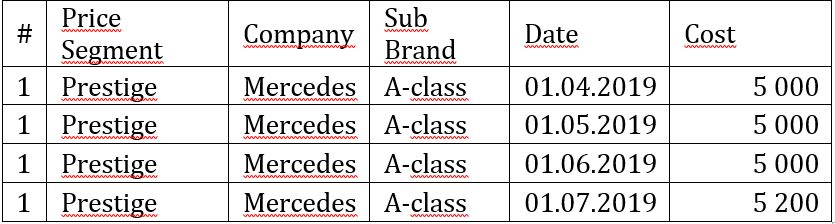

In [77]:
data = df.copy()

In [78]:
data.columns

Index([                '#',     'Price Segment',           'Company',
               'Sub Brand', 2019-01-01 00:00:00, 2019-02-01 00:00:00,
       2019-03-01 00:00:00, 2019-04-01 00:00:00, 2019-05-01 00:00:00,
       2019-06-01 00:00:00, 2019-07-01 00:00:00, 2019-08-01 00:00:00,
       2019-09-01 00:00:00, 2019-10-01 00:00:00, 2019-11-01 00:00:00],
      dtype='object', name=0)

In [79]:
dataa = data.set_index(["#","Price Segment","Company","Sub Brand"])

#### Транспонируем таблицу так чтобы, даты в столбцах собрались под один столбец а цены под другим.

In [80]:
df_transpose = dataa.T
df_transpose["Date"] = df_transpose.index
dataset = pd.melt(df_transpose, id_vars=["Date"])
dataset.columns = ["Date","#", "Price Segment","Company","Sub Brand","Cost"]
dataset.head()

,Date,#,Price Segment,Company,Sub Brand,Cost
0,2019-01-01,1,Prestige,Mercedes,A-class,5300
1,2019-02-01,1,Prestige,Mercedes,A-class,5300
2,2019-03-01,1,Prestige,Mercedes,A-class,5300
3,2019-04-01,1,Prestige,Mercedes,A-class,5000
4,2019-05-01,1,Prestige,Mercedes,A-class,5000


In [114]:
correct_data = dataset[['#', 'Price Segment', 'Company', 'Sub Brand','Date','Cost']]
correct_data.head()

,#,Price Segment,Company,Sub Brand,Date,Cost
0,1,Prestige,Mercedes,A-class,2019-01-01,5300
1,1,Prestige,Mercedes,A-class,2019-02-01,5300
2,1,Prestige,Mercedes,A-class,2019-03-01,5300
3,1,Prestige,Mercedes,A-class,2019-04-01,5000
4,1,Prestige,Mercedes,A-class,2019-05-01,5000


In [121]:
correct_data.set_index('Sub Brand')

,#,Price Segment,Company,Date,Cost
Sub Brand,,,,,
A-class,1,Prestige,Mercedes,2019-01-01,5300
A-class,1,Prestige,Mercedes,2019-02-01,5300
A-class,1,Prestige,Mercedes,2019-03-01,5300
A-class,1,Prestige,Mercedes,2019-04-01,5000
A-class,1,Prestige,Mercedes,2019-05-01,5000
...,...,...,...,...,...
H-1,4,Value,Hyundai,2019-07-01,4000
H-1,4,Value,Hyundai,2019-08-01,4000
H-1,4,Value,Hyundai,2019-09-01,4000


### Задание 3.	Сделав анализ Price Segment заполнить таблицу на странице Price Segmentation на последнюю дату
Incl. = Включительно

Пример:


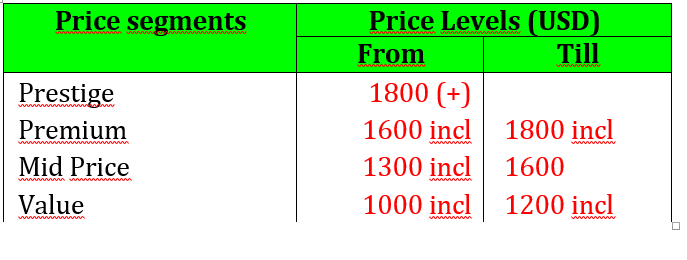

In [82]:
correct_data['Price Segment'].value_counts()

Value        583
Mid Price    297
Premium      176
Prestige      55
Name: Price Segment, dtype: int64

#### В графике ниже мы можем увидеть процентное соотношение Price Segments по  сумме Costs

Text(0.5, 1.0, 'Price Segments: ')

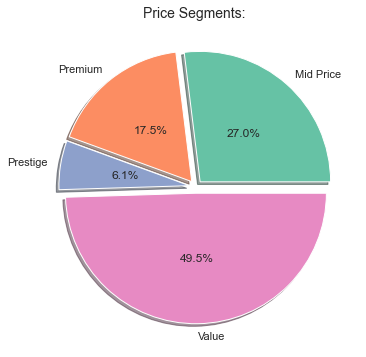

In [83]:
sns.set(style='whitegrid',palette='Set2')
price_seg= correct_data.groupby("Price Segment")['Cost'].sum()
pie, ax = plt.subplots(figsize=[10,6])
labels = price_seg.keys()
plt.pie(x=price_seg,autopct="%.1f%%",explode=[0.05]*4, labels=labels, pctdistance=0.5,shadow=True)
plt.title("Price Segments: ", fontsize=14)

#### Далее путем группировки и отдельных условии  определим  Ценовой диапазон  в каждом сегменте от минимального до максимального в ноябре месяце 2019 года.

#### Segment: Prestige 

In [84]:
by_november = correct_data["Date"]=='2019-11-01'
prestige_segments= correct_data['Price Segment']=='Prestige'
prestige_data = correct_data.loc[by_november & prestige_segments]
prestige_data.head()

,#,Price Segment,Company,Sub Brand,Date,Cost
10,1,Prestige,Mercedes,A-class,2019-11-01,5300
21,1,Prestige,Mercedes,AMG GT,2019-11-01,5300
32,1,Prestige,Toyota,4Runner,2019-11-01,5200
43,1,Prestige,Kia,Carens,2019-11-01,5600
54,2,Prestige,Mercedes,AMG GT 4-Door,2019-11-01,5000


In [85]:
print(prestige_data.min())

#                                  1
Price Segment               Prestige
Company                          Kia
Sub Brand                    4Runner
Date             2019-11-01 00:00:00
Cost                            5000
dtype: object


In [86]:
min_prestige = prestige_data['Cost'].min()
print("From: ",min_prestige)

From:  5000


#### Segment: Premium

In [87]:
by_november = correct_data["Date"]=='2019-11-01'
premium_segments= correct_data['Price Segment']=='Premium'
premium_data = correct_data.loc[by_november & premium_segments]
premium_data.head()

,#,Price Segment,Company,Sub Brand,Date,Cost
65,2,Premium,Mercedes,B-class,2019-11-01,4800
76,2,Premium,Mercedes,C-class,2019-11-01,4800
87,2,Premium,Mercedes,C-class Sport Coupe,2019-11-01,4800
98,2,Premium,Toyota,Alphard,2019-11-01,4900
109,2,Premium,Toyota,Auris,2019-11-01,4900


In [88]:
premium_data["Price Segment"].value_counts()

Premium    16
Name: Price Segment, dtype: int64

In [89]:
print(premium_data.min())
print(premium_data.max())

#                                  2
Price Segment                Premium
Company                          BMW
Sub Brand                     Accent
Date             2019-11-01 00:00:00
Cost                            4600
dtype: object
#                                  2
Price Segment                Premium
Company                       Toyota
Sub Brand                         i8
Date             2019-11-01 00:00:00
Cost                            4900
dtype: object


In [90]:
min_premium = premium_data['Cost'].min()
max_premium = premium_data['Cost'].max()
print("From: ",min_premium,"\nTill: ",max_premium)

From:  4600 
Till:  4900


#### Segment: Mid Price

In [91]:
by_november = correct_data["Date"]=='2019-11-01'
midPrice_segments= correct_data['Price Segment']=='Mid Price'
midPrice_data = correct_data.loc[by_november & midPrice_segments]
midPrice_data.head()

,#,Price Segment,Company,Sub Brand,Date,Cost
241,3,Mid Price,Mercedes,CL-class,2019-11-01,4500
252,3,Mid Price,Mercedes,CLA-class,2019-11-01,4500
263,3,Mid Price,Mercedes,CLC-class,2019-11-01,4600
274,3,Mid Price,Mercedes,CLK-class,2019-11-01,4400
285,3,Mid Price,Mercedes,CLS-class,2019-11-01,4400


In [92]:
midPrice_data["Price Segment"].value_counts()

Mid Price    27
Name: Price Segment, dtype: int64

In [93]:
print(midPrice_data.min())
print(midPrice_data.max())

#                                  3
Price Segment              Mid Price
Company                          BMW
Sub Brand              Avensis Verso
Date             2019-11-01 00:00:00
Cost                            4200
dtype: object
#                                  4
Price Segment              Mid Price
Company                       Toyota
Sub Brand                         X3
Date             2019-11-01 00:00:00
Cost                            4600
dtype: object


In [94]:
min_midPrice = midPrice_data['Cost'].min()
max_midPrice = midPrice_data['Cost'].max()
print("incl From: ",min_midPrice,"\nTill: ",max_midPrice)

incl From:  4200 
Till:  4600


#### Segment: Value

In [95]:
by_november = correct_data["Date"]=='2019-11-01'
value_segments= correct_data['Price Segment']=='Value'
value_data = correct_data.loc[by_november & value_segments]
value_data.head()

,#,Price Segment,Company,Sub Brand,Date,Cost
538,4,Value,Mercedes,GL-class,2019-11-01,4200
549,4,Value,Mercedes,GLA-class,2019-11-01,4200
560,4,Value,Mercedes,GLC-class,2019-11-01,4200
571,4,Value,Mercedes,GLC-class Coupe,2019-11-01,4200
582,4,Value,Mercedes,GLE-class,2019-11-01,4100


In [96]:
value_data["Price Segment"].value_counts()

Value    53
Name: Price Segment, dtype: int64

In [97]:
print(value_data.min())
print(value_data.max())

#                                  4
Price Segment                  Value
Company                      Hyundai
Sub Brand                    Caldina
Date             2019-11-01 00:00:00
Cost                            4000
dtype: object
#                                  4
Price Segment                  Value
Company                       Toyota
Sub Brand                    X-class
Date             2019-11-01 00:00:00
Cost                            4200
dtype: object


In [98]:
min_value = value_data['Cost'].min()
max_value = value_data['Cost'].max()
print("incl From: ",min_value,"\nincl Till: ",max_value)

incl From:  4000 
incl Till:  4200


In [99]:
segmentation = pd.read_excel("C:\\Users\\Айдана\\Downloads\\CIS+pricing table_Nov2019_KAZ.xlsx", skiprows=3, usecols='B:E',sheet_name="Price Segmentation",header=0)
segmentation.head()

,Price segments,Price Levels (USD),Unnamed: 3,Comments
0,NaN,From,Till,NaN
1,Prestige,(+),NaN,NaN
2,Premium,incl,incl,NaN
3,Mid Price,incl,NaN,NaN
4,Value,incl,incl,NaN


In [100]:
segmentation.loc[1,'Price Levels (USD)'] = str(min_prestige) + " (+)"
segmentation.loc[1,'Unnamed: 3'] = "-"

segmentation.loc[2,'Price Levels (USD)'] = str(min_premium) + " incl"
segmentation.loc[2,'Unnamed: 3'] = str(max_premium) + " incl"

segmentation.loc[3,'Price Levels (USD)'] = str(min_midPrice) + " incl"
segmentation.loc[3,'Unnamed: 3'] = str(max_midPrice)

segmentation.loc[4,'Price Levels (USD)'] = str(min_value) + " incl"
segmentation.loc[4,'Unnamed: 3'] = str(max_value) + " incl"

segmentation.head()


,Price segments,Price Levels (USD),Unnamed: 3,Comments
0,NaN,From,Till,NaN
1,Prestige,5000 (+),-,NaN
2,Premium,4600 incl,4900 incl,NaN
3,Mid Price,4200 incl,4600,NaN
4,Value,4000 incl,4200 incl,NaN
